In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [0]:
from sklearn.datasets.samples_generator import make_blobs
# Generate isotropic Gaussian blobs for clustering.

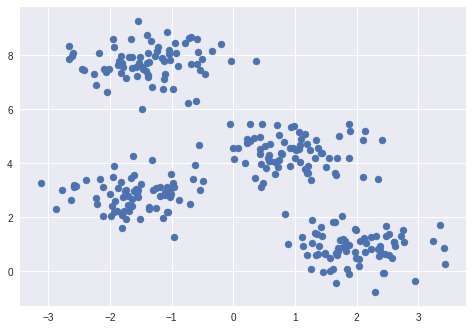

In [123]:
# create dataset
X, labels = make_blobs(n_samples=300, n_features=2, centers=4,
                       cluster_std=0.60, random_state=0)
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
# X = vector with two features
# X Shape = array of shape [n_samples, n_features]
# labels = The integer labels for cluster membership of each sample. 
# labels Shape = array of shape [n_samples]
plt.scatter(X[:, 0], X[:, 1], s=50);

In [0]:
from sklearn.cluster import KMeans

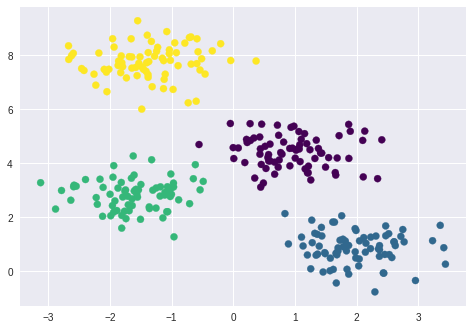

In [125]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
# c = A sequence of n numbers to be mapped to colors.
# s = size of points in graph
# cmap = color map
# real dataset representation with true membership values for each point

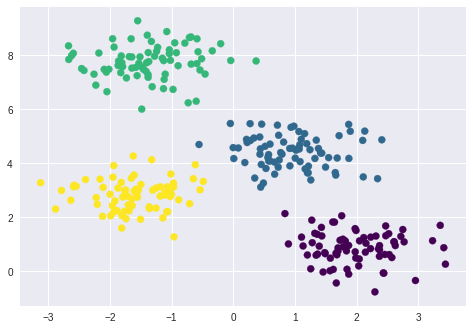

In [126]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
labels_pred_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels_pred_kmeans, s=50, cmap='viridis')
# predicted representation of dataset using Kmeans

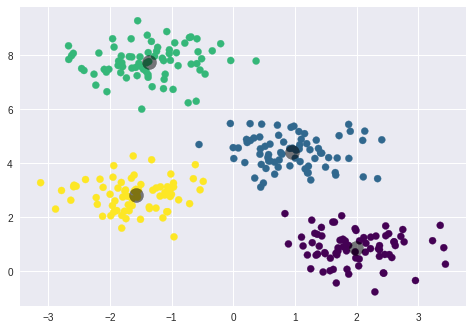

In [127]:
plt.scatter(X[:, 0], X[:, 1], c=labels_pred_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
# centers of each cluster which are predicted using kmeans

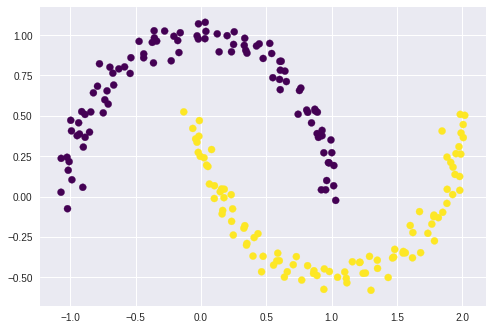

In [128]:
from sklearn.datasets import make_moons
X, labels = make_moons(200, noise=.05, random_state=0)
# Actual dataset representation
plt.scatter(X[:,0],X[:,1],c=labels,s=50, cmap='viridis')

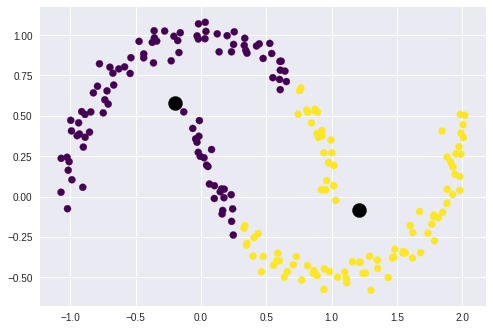

In [129]:
# K-Means fails to correctly differentiate the two clusters
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

kmeans = KMeans(2, random_state=0)
labels_pred_kmeans = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels_pred_kmeans,
            s=50, cmap='viridis');
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black',
            s=200, cmap='viridis');

In [130]:
from sklearn.metrics import accuracy_score
accuracy_score(labels,labels_pred_kmeans)

0.755

In [0]:
import numpy as np
import cStringIO # *much* faster than StringIO
import urllib
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import random

In [0]:
def url_to_image(url):
  file = urllib.urlopen(url)
  img_data = cStringIO.StringIO(file.read()) # constructs a StringIO holding the image
  img = Image.open(img_data)
  return img

def image_to_rgbarray(image):
  return np.array(image)

In [0]:
def black_and_white_mode():
  colors = [(0,0,0),(255,255,255)]
  return colors

def color_mode(bit,shape):
  color_min = 0
  color_max = 255
  colors = []
  for i in range(0,shape[0]):
    colors.append((random.randint(color_min,color_max),random.randint(color_min,color_max),random.randint(color_min,color_max)))
  return colors

In [0]:
def segmented_image_portions_bw(original_image,centers,labels):
  image = original_image
  original_shape = image.shape
  image = image.reshape((image.shape[0] * image.shape[1], image.shape[2]))
 
  for i in range(0,image.shape[0]):
    image[i,:] = (0,0,0)
  
  centers_count = centers.shape[0]
  
  seg_portions = [image for i in range(0,centers_count)]
  seg_portions = np.array(seg_portions)
  
  
  for i in range(0,image.shape[0]):
    cluster_no = labels[i]
    seg_portions[cluster_no][i,:] = (255,255,255)
  
  return seg_portions


def segmented_image_portions(original_image,centers,labels):
  image = original_image
  original_shape = image.shape
  image = image.reshape((image.shape[0] * image.shape[1], image.shape[2]))
 
  for i in range(0,image.shape[0]):
    image[i,:] = (0,0,0)
  
  centers_count = centers.shape[0]
  
  seg_portions = [image for i in range(0,centers_count)]
  seg_portions = np.array(seg_portions)
  
  
  for i in range(0,image.shape[0]):
    cluster_no = labels[i]
    seg_portions[cluster_no][i,:] = centers[cluster_no]
  
  return seg_portions
  

  

In [0]:
def kmeans_seg(image_url,cluster_count,init_centers):
  
  # Extract pixel data from image 
  original_image = url_to_image(image_url)
  image = image_to_rgbarray(original_image)
  
  # Plot original Image
  plt.figure()
  plt.axis("off")
  plt.title("Original Image")
  plt.imshow(image)
  
  print("original shape: " + str(image.shape))
  
  # Reshape image 
  original_shape = image.shape
  image = image.reshape((image.shape[0] * image.shape[1], image.shape[2]))
  
  print("converted shape: " + str(image.shape))

  # cluster_count = 2 for B&W mode
  # cluster_count > 2 for color mode

  if init_centers is None:
    kmeans = KMeans(n_clusters=cluster_count)
  else:
    kmeans = KMeans(n_clusters=cluster_count,init=init_centers)
    
  # main kmeans algo  
  kmeans = KMeans(n_clusters=cluster_count)
  kmeans.fit(image)
  labels = kmeans.predict(image)

  kmeans_centers = kmeans.cluster_centers_
  
  print("centers: " + str(kmeans_centers))

  # colors = color_mode(cluster_count,centers.shape)
  # colors = black_and_white_mode()
  
  colors = kmeans_centers

  # assign color of their respective cluster center for each pixel 
  for i in range(0,image.shape[0]):
      cluster_no = labels[i]
      image[i,:] = colors[cluster_no]
  
  # convert back to original shape
  kmeans_seg_image = image.reshape(original_shape)

  # Plot segmented image
  plt.figure()
  plt.axis("off")
  plt.title("Quantized Image")
  # plt.gray()
  plt.imshow(kmeans_seg_image)


  # Extract segment data in color and B/W for every segment
  segmented_portions_kmeans = segmented_image_portions(original_image_data,kmeans_centers,labels)

  segmented_portions_kmeans = np.reshape(segmented_portions_kmeans,(segmented_portions_kmeans.shape[0],)+ original_shape)

  segmented_portions_bw_kmeans = segmented_image_portions_bw(original_image_data,kmeans_centers,labels)

  segmented_portions_bw_kmeans = np.reshape(segmented_portions_bw_kmeans,(segmented_portions_bw_kmeans.shape[0],)+ original_shape)
  
  # plot segmented portions
  for i in range(0,segmented_portions_kmeans.shape[0]):
    f = plt.figure()
    f.set_figheight(18)
    f.set_figwidth(17.6)
    f.add_subplot(1,2, 1)
    plt.axis("off")
    plt.title("Segmented Portion: "+ str(i+1))
    plt.imshow(segmented_portions_kmeans[i])
    f.add_subplot(1,2, 2)
    plt.axis("off")
    plt.title("Segmented Portion B&W: "+ str(i+1))
    plt.imshow(segmented_portions_bw_kmeans[i])
  
  return kmeans_seg_image,colors  

original shape: (321, 481, 3)
converted shape: (154401, 3)
centers: [[219.69010001 240.10615653 245.67652078]
 [ 85.14537764  95.17355488  98.41766365]
 [154.32213069 179.23244986 194.72230181]]


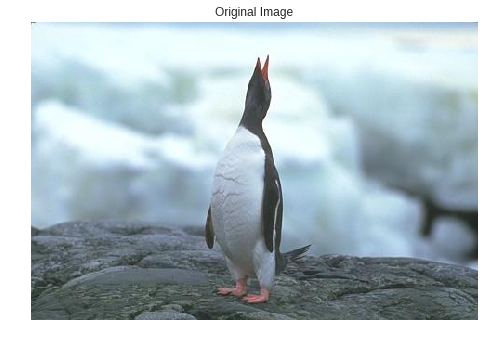

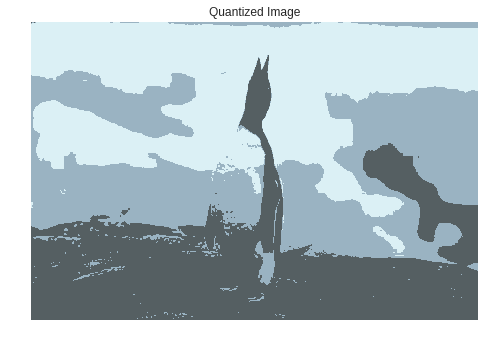

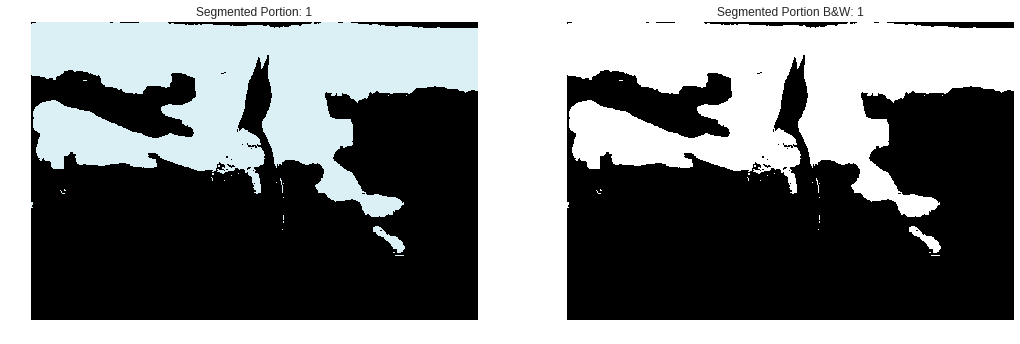

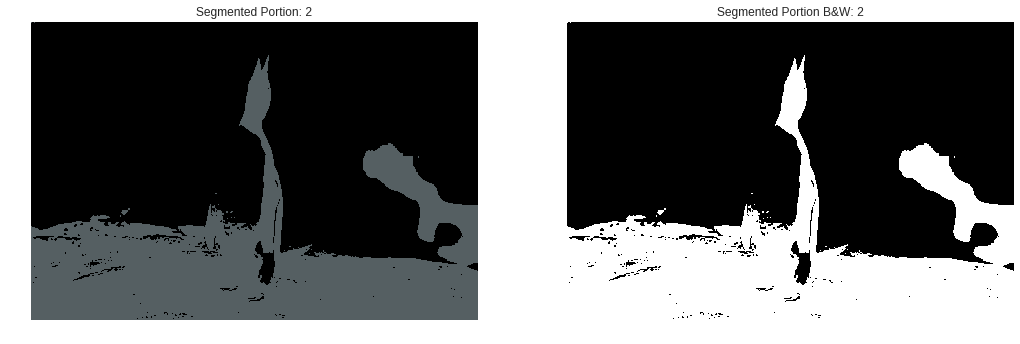

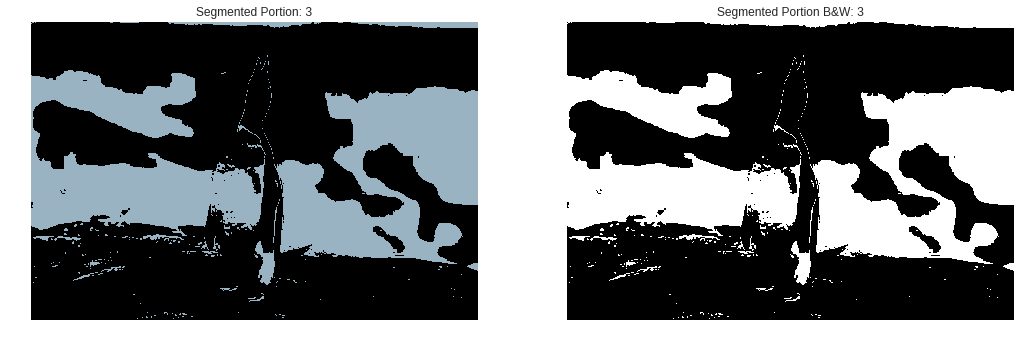

In [136]:
url = 'https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/106024.jpg'
count = 3
kmeans_seg_image,kmeans_centers = kmeans_seg(cluster_count=count,image_url=url,init_centers=None)

In [137]:
!pip install scikit-fuzzy

In [0]:
# https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.html#skfuzzy.cmeans

import skfuzzy as fuzzy

In [0]:
def get_labels(cluster_membership):
  labels = []
  for pixel in cluster_membership.T:
    labels.append(np.argmax(pixel))
  return labels

In [0]:
def fcm_seg(image_url,cluster_count):
 
  original_image = url_to_image(image_url)
  image = image_to_rgbarray(original_image)
  
  # Plot original Image
  plt.figure()
  plt.axis("off")
  plt.title("Original Image")
  plt.imshow(image)
  
  print("original shape: " + str(image.shape))

  original_shape = image.shape
  image = image.reshape((image.shape[0] * image.shape[1], image.shape[2]))
  
  print("converted shape: " + str(image.shape))
  
  cntr,u,u0,d,jm,p,fpc = fuzzy.cmeans(data=image.T,c=cluster_count,m=3, error=0.0001, maxiter=1000, init=None, seed=None)

  fcm_centers = cntr # centers
  labels = u # membership values of a pixel for each cluster
  
  print("centers: " + str(fcm_centers))

  colors = fcm_centers

  labels = get_labels(labels)

  for i in range(0,image.shape[0]):
      cluster_no = labels[i]
      image[i,:] = colors[cluster_no]

  fuzzy_seg_image = image.reshape(original_shape)

  plt.figure()
  plt.axis("off")
  plt.title("Quantized Image")
  plt.imshow(fuzzy_seg_image)

  segmented_portions_fcm = segmented_image_portions(original_image_data,colors,labels)

  segmented_portions_fcm = np.reshape(segmented_portions_fcm,(segmented_portions_fcm.shape[0],)+ original_shape)

  segmented_portions_bw_fcm = segmented_image_portions_bw(original_image_data,colors,labels)

  segmented_portions_bw_fcm = np.reshape(segmented_portions_bw_fcm,(segmented_portions_bw_fcm.shape[0],)+ original_shape)


  for i in range(0,segmented_portions_fcm.shape[0]):
    f = plt.figure()
    f.set_figheight(18)
    f.set_figwidth(17.6)
    f.add_subplot(1,2, 1)
    plt.axis("off")
    plt.title("Segmented Portion: "+ str(i+1))
    plt.imshow(segmented_portions_fcm[i])
    f.add_subplot(1,2, 2)
    plt.axis("off")
    plt.title("Segmented Portion B&W: "+ str(i+1))
    plt.imshow(segmented_portions_bw_fcm[i])
    
  return fuzzy_seg_image,fcm_centers
  

original shape: (321, 481, 3)
converted shape: (154401, 3)
centers: [[154.13492535 179.18109132 194.5883783 ]
 [ 82.08415559  92.28943862  94.36777639]
 [224.26570985 243.45083883 247.76652131]]


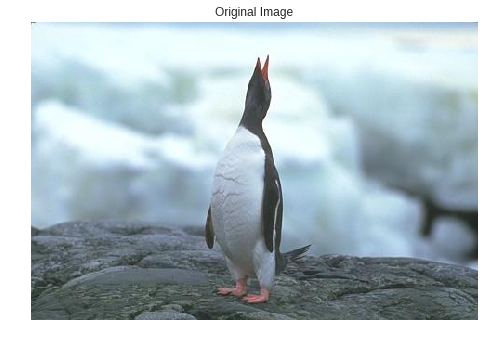

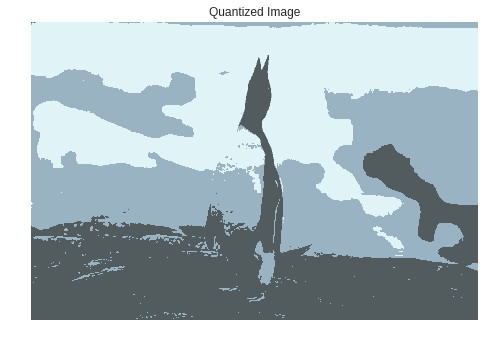

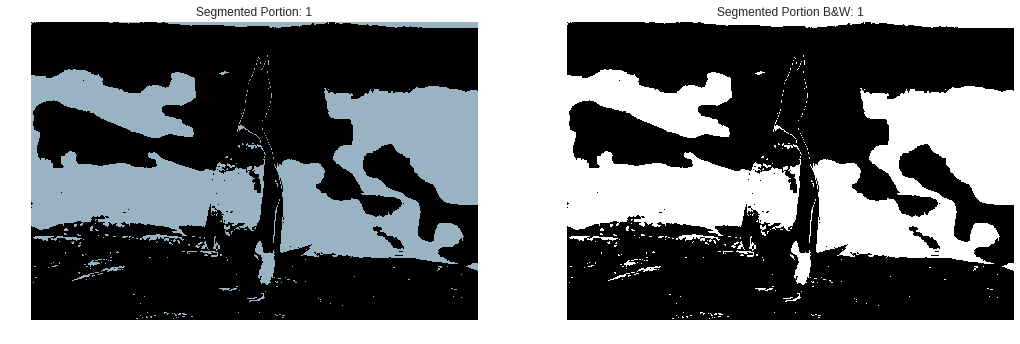

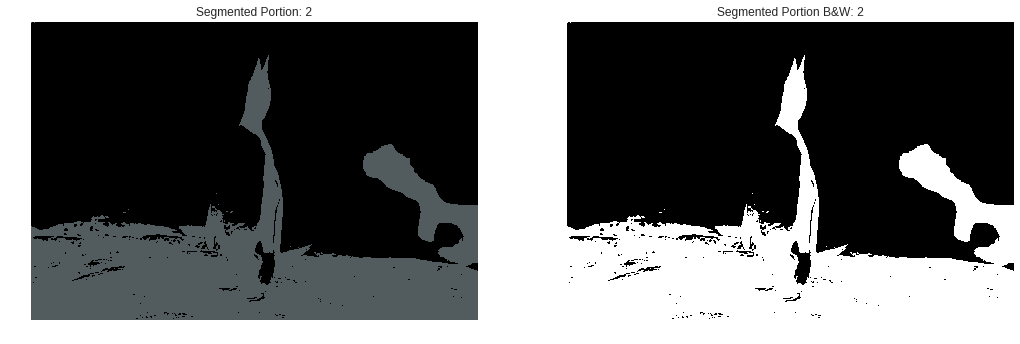

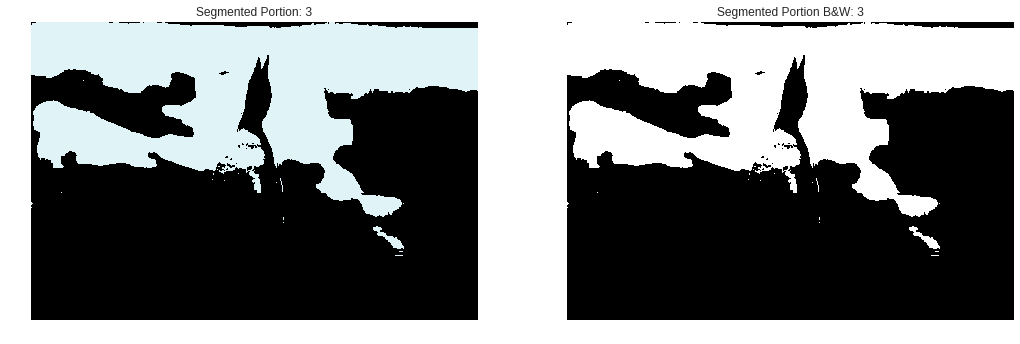

In [141]:
url = 'https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/106024.jpg'
count = 3
fcm_seg_image,fcm_centers = fcm_seg(image_url=url,cluster_count=count)

In [0]:
def compare_images(kmeans_seg_image,kmeans_centers,fcm_seg_image,fcm_centers):
  print("\n")
  print("K-Means Centers: " + str(kmeans_centers))
  print("\n")
  print("Fuzzy C-Means Centers: " + str(fcm_centers))
  print("\n")

  # customize plot
  f = plt.figure()
  f.set_figheight(18)
  f.set_figwidth(17.6)

  f.add_subplot(1,2, 1)
  plt.axis("off")
  plt.title("K-Means Quantized Image")
  plt.imshow(kmeans_seg_image)

  f.add_subplot(1,2, 2)
  plt.axis("off")
  plt.title("Fuzzy C-Means Quantized Image")
  plt.imshow(fcm_seg_image)
  



K-Means Centers: [[219.69010001 240.10615653 245.67652078]
 [ 85.14537764  95.17355488  98.41766365]
 [154.32213069 179.23244986 194.72230181]]


Fuzzy C-Means Centers: [[154.13492535 179.18109132 194.5883783 ]
 [ 82.08415559  92.28943862  94.36777639]
 [224.26570985 243.45083883 247.76652131]]




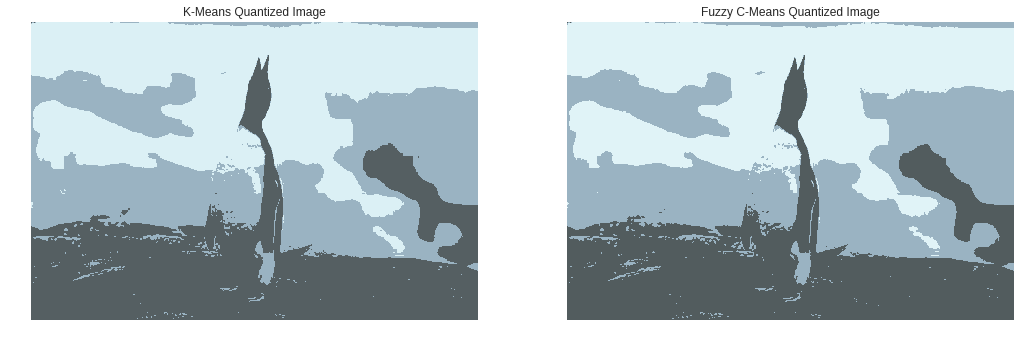

In [143]:
compare_images(kmeans_seg_image,kmeans_centers,fcm_seg_image,fcm_centers)